In [12]:
import pandas as pd
import random

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [5]:
# Carregar os dados
df = pd.read_csv("dados/sorteios_eurom.csv")

df.columns = [int(col) if col.isdigit() else col for col in df.columns]

# Criar um DataFrame com a contagem de cada número por ano
anos = list(range(2004, 2025 + 1))
numeros = list(range(1, 51))

dados = {"Número": numeros}
for ano in anos:
    dados[ano] = [df[df["Ano"] == ano][num].sum() for num in numeros]

dados["Total"] = [sum(df[num]) for num in numeros]

# Criar DataFrame e salvar
df_resumo = pd.DataFrame(dados)
df_resumo.to_csv("dados/resumo_sorteio.csv", index=False)

# Gerar ciclos de grupos
ciclos = {}
for i in range(1, 6):  # Criar 5 ciclos
    numeros_disponiveis = set(numeros)
    grupos = []
    for _ in range(10):  # Criar 10 grupos de 3
        grupo = random.sample(sorted(numeros_disponiveis), 3)
        grupos.append(tuple(grupo))
        numeros_disponiveis -= set(grupo)
    for _ in range(5):  # Criar 5 grupos de 4
        grupo = random.sample(sorted(numeros_disponiveis), 4)
        grupos.append(tuple(grupo))
        numeros_disponiveis -= set(grupo)
    
    # Criar dicionário do ciclo com soma dos totais
    ciclo_dict = {grupo: sum(df_resumo[df_resumo["Número"].isin(grupo)]["Total"]) for grupo in grupos}
    ciclos[f"ciclo_{i}"] = ciclo_dict

# Exibir resultado
for ciclo, grupos in ciclos.items():
    print(ciclo, grupos)

ciclo_1 {(30, 26, 38): 539, (16, 13, 5): 532, (37, 29, 11): 558, (3, 36, 31): 509, (46, 15, 10): 528, (21, 8, 32): 530, (39, 24, 33): 503, (43, 9, 20): 513, (50, 44, 34): 567, (6, 17, 12): 541, (4, 28, 22, 45): 674, (27, 7, 14, 40): 707, (41, 47, 49, 35): 659, (25, 18, 19, 1): 716, (48, 2, 42, 23): 733}
ciclo_2 {(17, 6, 46): 509, (49, 39, 38): 520, (5, 15, 12): 541, (45, 35, 42): 556, (4, 19, 2): 549, (44, 8, 41): 508, (10, 20, 34): 565, (30, 21, 25): 562, (1, 24, 47): 505, (31, 28, 27): 522, (43, 23, 13, 11): 713, (14, 29, 22, 33): 674, (9, 50, 32, 40): 688, (48, 3, 36, 16): 689, (18, 7, 26, 37): 708}
ciclo_3 {(41, 12, 10): 527, (39, 43, 17): 521, (1, 26, 5): 533, (24, 47, 30): 507, (8, 19, 45): 541, (35, 20, 28): 542, (6, 40, 25): 520, (7, 37, 48): 537, (33, 18, 36): 474, (21, 16, 9): 546, (50, 3, 14, 46): 702, (22, 27, 34, 2): 676, (11, 38, 4, 31): 707, (23, 15, 13, 29): 756, (32, 44, 49, 42): 720}
ciclo_4 {(3, 23, 19): 577, (22, 45, 30): 494, (26, 5, 1): 533, (32, 42, 39): 534, (47

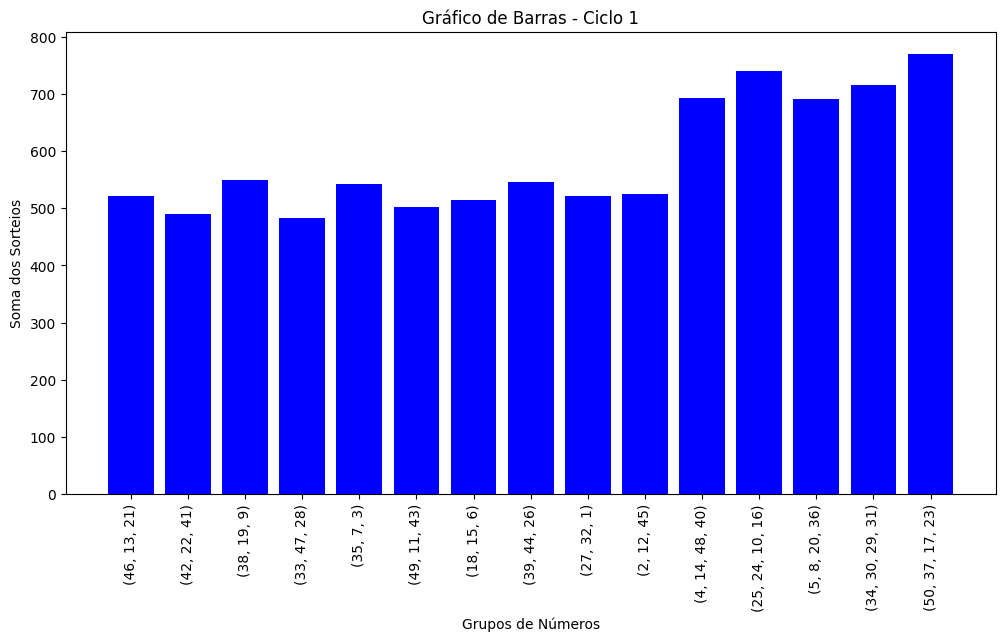

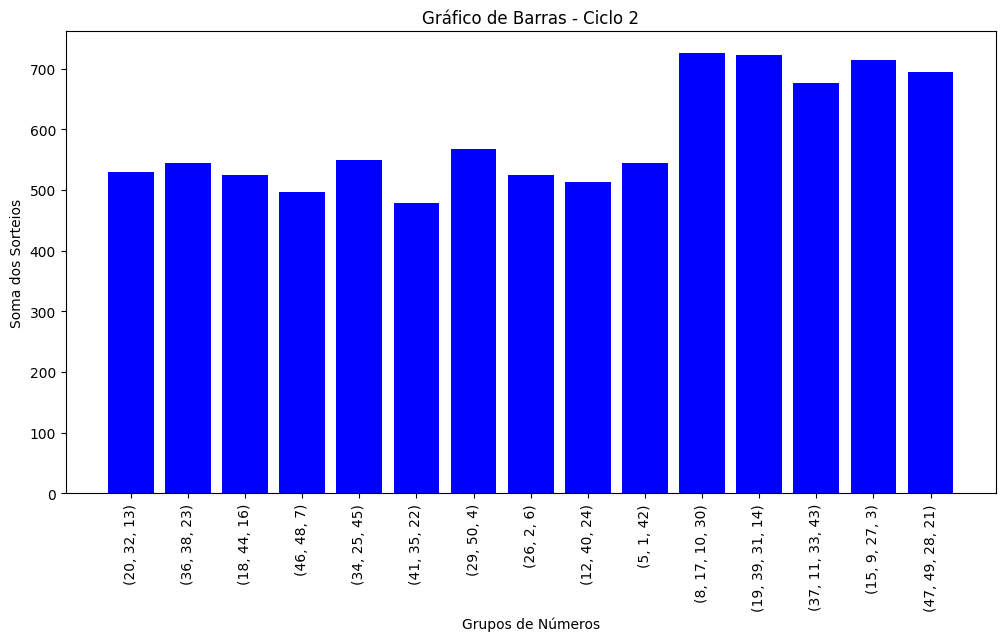

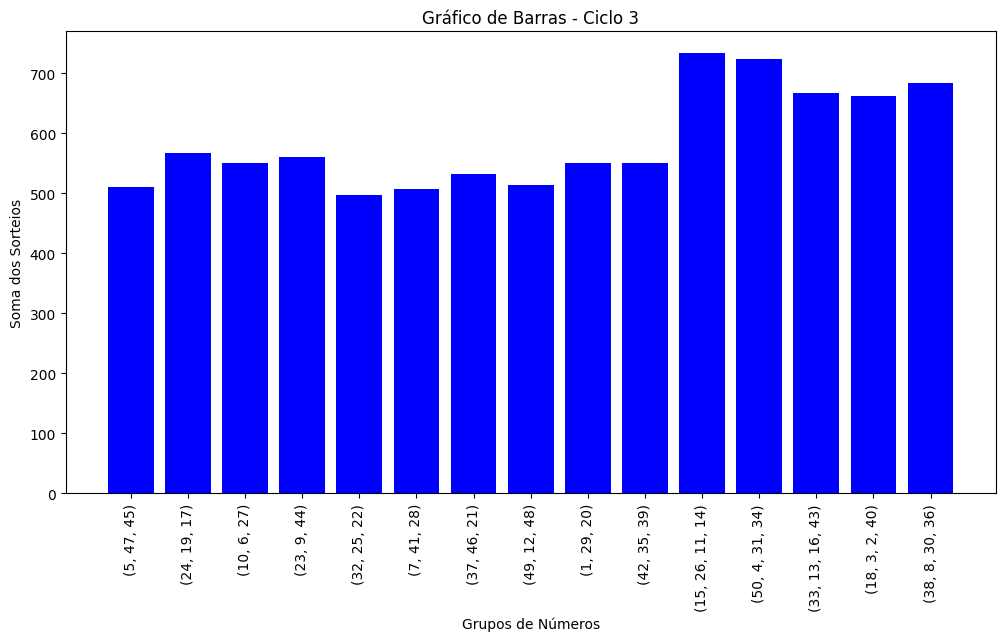

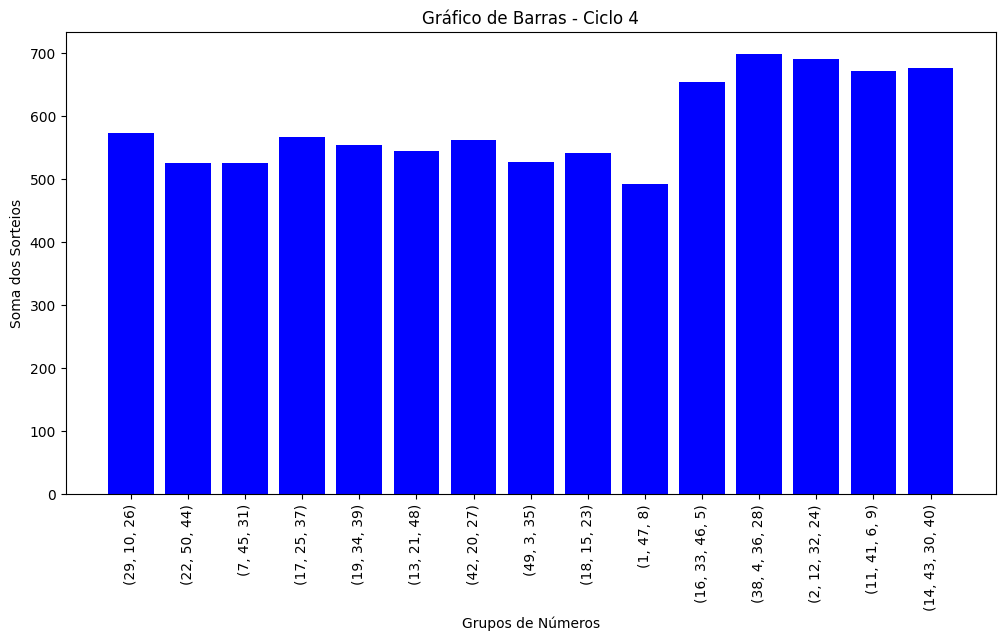

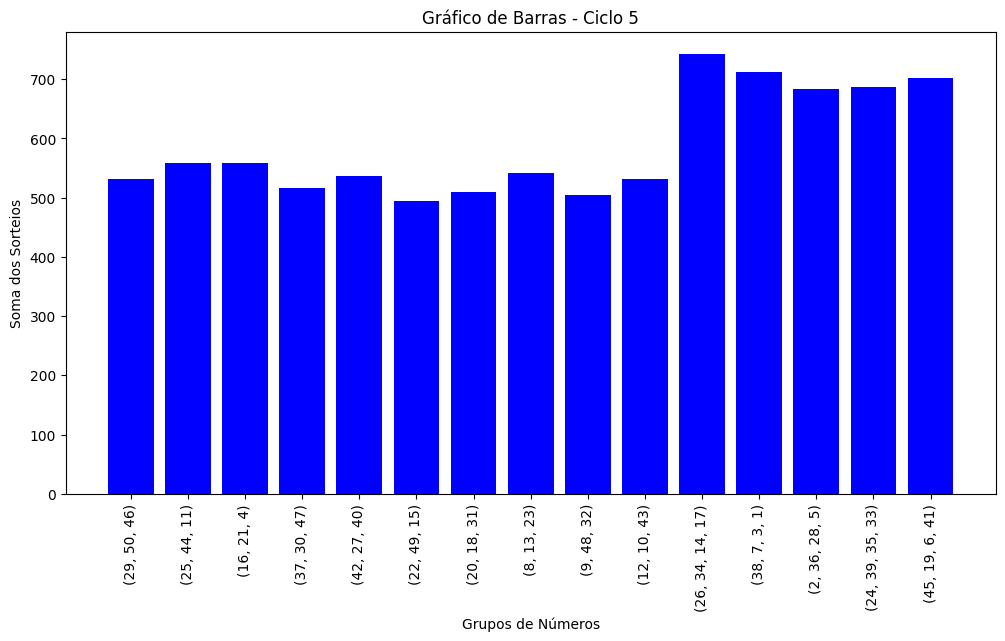

In [17]:
# Carregar os dados
df = pd.read_csv("dados/sorteios_eurom.csv")

df.columns = [int(col) if col.isdigit() else col for col in df.columns]

# Criar o dataframe resumo
anos = list(range(2004, 2026))
numeros = list(range(1, 51))

dados = {"Número": numeros}
for ano in anos:
    dados[ano] = [df[df["Ano"] == ano][num].sum() if num in df.columns else 0 for num in numeros]

dados["Total"] = [sum(df[num]) if num in df.columns else 0 for num in numeros]

df_resumo = pd.DataFrame(dados)
df_resumo.to_csv("dados/resumo_sorteio.csv", index=False)

# Gerar ciclos
def gerar_ciclos(n_ciclos=5):
    ciclos = []
    for _ in range(n_ciclos):
        numeros_disponiveis = set(numeros)
        grupos = []
        for _ in range(10):
            grupo = random.sample(sorted(numeros_disponiveis), 3)
            grupos.append(tuple(grupo))
            numeros_disponiveis -= set(grupo)
        for _ in range(5):
            grupo = random.sample(sorted(numeros_disponiveis), 4)
            grupos.append(tuple(grupo))
            numeros_disponiveis -= set(grupo)
        ciclos.append(grupos)
    return ciclos

ciclos = gerar_ciclos()

# Criar dicionários para os ciclos
ciclos_dicts = []
for ciclo in ciclos:
    ciclo_dict = {grupo: sum(df_resumo[df_resumo["Número"].isin(grupo)]["Total"].values) for grupo in ciclo}
    ciclos_dicts.append(ciclo_dict)

# Verificar normalidade e criar gráficos de barras para cada ciclo
for i, ciclo_dict in enumerate(ciclos_dicts, start=1):
    valores = list(ciclo_dict.values())
    media = np.mean(valores)
    desvio_padrao = np.std(valores)
    
    # Gráfico de barras
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(ciclo_dict)), valores, tick_label=[str(grupo) for grupo in ciclo_dict.keys()], color='b')
    plt.xticks(rotation=90)
    plt.title(f'Gráfico de Barras - Ciclo {i}')
    plt.xlabel('Grupos de Números')
    plt.ylabel('Soma dos Sorteios')
    plt.show()